In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
from google.colab import files
uploaded=files.upload()

Saving UpdatedResumeDataSet.csv to UpdatedResumeDataSet.csv


In [7]:
df=pd.read_csv('UpdatedResumeDataSet.csv')
df

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [18]:
df.Category.value_counts()

,count
Category,
Java Developer,84
Testing,70
DevOps Engineer,55
Python Developer,48
Web Designing,45
HR,44
Hadoop,42
Sales,40
Data Science,40


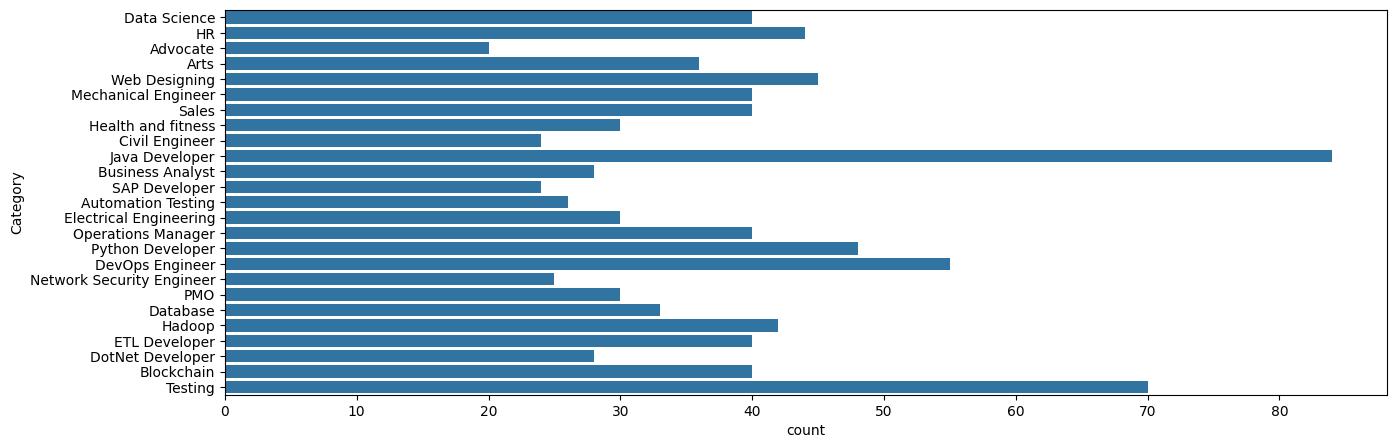

In [19]:
plt.figure(figsize=(15,5))
sns.countplot(df.Category)
plt.show()

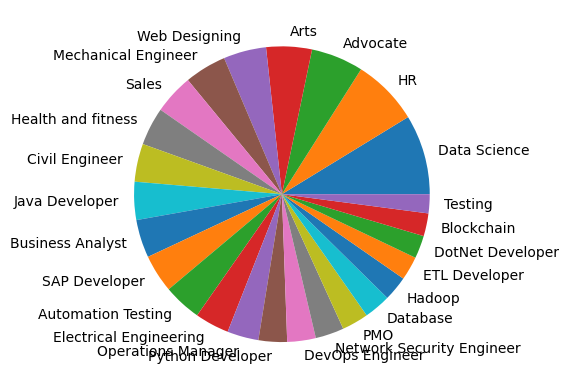

In [20]:
counts =df['Category'].value_counts()
labels=df['Category'].unique()
plt.pie(counts,labels=labels )
plt.show()

In [21]:
df

,Category,Resume
0,Data Science,Skills Programming Languages Python pandas num...
1,Data Science,Education Details May 2013 to May 2017 BE UITR...
2,Data Science,Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,Education Details MCA YMCAUST Faridabad Haryan...
...,...,...
957,Testing,Computer Skills â¢ Proficient in MS office Wo...
958,Testing,â Willingness to a ept the challenges â Po...
959,Testing,PERSONAL SKILLS â¢ Quick learner â¢ Eagernes...
960,Testing,COMPUTER SKILLS SOFTWARE KNOWLEDGE MSPower Poi...


Cleaning process in Resume


In [31]:
import re
def cleanResume(txt):
  cleanTxt=re.sub('http\S+\s','',txt)
  cleanTxt=re.sub('RT|cc',' ',cleanTxt)
  cleanTxt=re.sub('#\S+','',cleanTxt)
  cleanTxt=re.sub('@\S+','',cleanTxt)
  cleanTxt=re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""),'',cleanTxt)
  cleanTxt=re.sub('\s+',' ',cleanTxt)
  cleanTxt=re.sub('â¢',' ',cleanTxt)

  return cleanTxt

In [23]:
df['Resume']=df['Resume'].apply(lambda x:cleanResume(x))
df


,Category,Resume
0,Data Science,Skills Programming Languages Python pandas num...
1,Data Science,Education Details May 2013 to May 2017 BE UITR...
2,Data Science,Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,Education Details MCA YMCAUST Faridabad Haryan...
...,...,...
957,Testing,Computer Skills â¢ Proficient in MS office Wo...
958,Testing,â Willingness to a ept the challenges â Po...
959,Testing,PERSONAL SKILLS â¢ Quick learner â¢ Eagernes...
960,Testing,COMPUTER SKILLS SOFTWARE KNOWLEDGE MSPower Poi...


In [32]:
df.Resume[0]

'Skills Programming Languages Python pandas numpy scipy scikitlearn matplotlib Sql Java JavaScriptJQuery Machine learning Regression SVM NaÃ¯ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3js DCjs Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learningEducation Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the revi

In [33]:
df.Category

,Category
0,6
1,6
2,6
3,6
4,6
...,...
957,23
958,23
959,23
960,23


In [34]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [35]:
le.fit(df['Category'])
df['Category']=le.transform(df['Category'])

In [36]:
df.Category

,Category
0,6
1,6
2,6
3,6
4,6
...,...
957,23
958,23
959,23
960,23


**Vactorization**

In [37]:
from typing_extensions import Required
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

tfidf.fit(df['Resume'])


Required_text=tfidf.transform(df['Resume'])

In [30]:
df

,Category,Resume
0,6,Skills Programming Languages Python pandas num...
1,6,Education Details May 2013 to May 2017 BE UITR...
2,6,Areas of Interest Deep Learning Control System...
3,6,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,6,Education Details MCA YMCAUST Faridabad Haryan...
...,...,...
957,23,Computer Skills â¢ Proficient in MS office Wo...
958,23,â Willingness to a ept the challenges â Po...
959,23,PERSONAL SKILLS â¢ Quick learner â¢ Eagernes...
960,23,COMPUTER SKILLS SOFTWARE KNOWLEDGE MSPower Poi...


**Splitting Text**

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(Required_text,df['Category'],test_size=0.2,random_state=0)

In [41]:
x_test.shape

(193, 7928)

In [42]:
x_train.shape

(769, 7928)

**Training the Model and prediction**

In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

clf=OneVsRestClassifier(KNeighborsClassifier())
clf.fit(x_train,y_train)

y_pred=clf.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.9792746113989638


In [50]:
import pickle
pickle.dump(tfidf,open('tfidf.pkl','wb'))
pickle.dump(clf,open('clf.pkl','wb'))